# AI & ML Internship                    Task-7
### By Elevate Labs

# 1.Load and Visualize Dataset (with optional PCA for 2D view)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


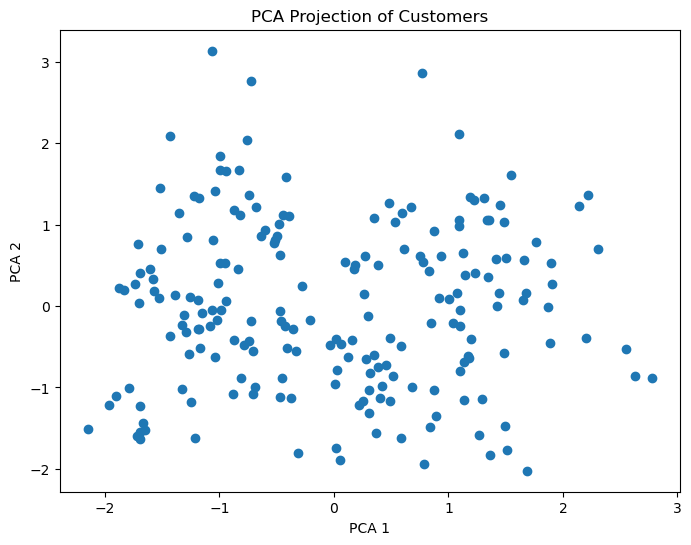

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Basic info and check
print(df.head())
print(df.info())

# Drop unnecessary columns (e.g., CustomerID)
df = df.drop('CustomerID', axis=1)

# Encode Gender if needed
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Optional: PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_df)
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.title('PCA Projection of Customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


# 2. .Fit K-Means and assign cluster labels.

In [27]:
from sklearn.cluster import KMeans

# Fit KMeans for an example value, say K=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)

# Assign labels
df['Cluster'] = kmeans.labels_


C:\Users\sujal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 3.Use the Elbow Method to find optimal K.


C:\Users\sujal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

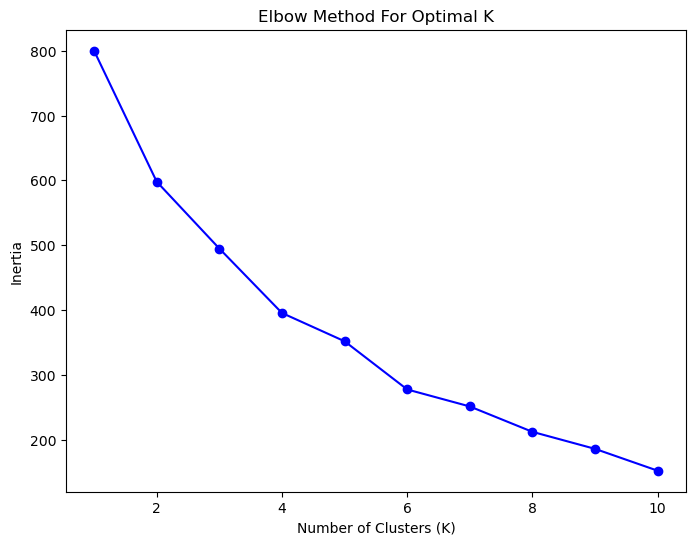

In [25]:
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


# 4. Visualize clusters with color-coding.


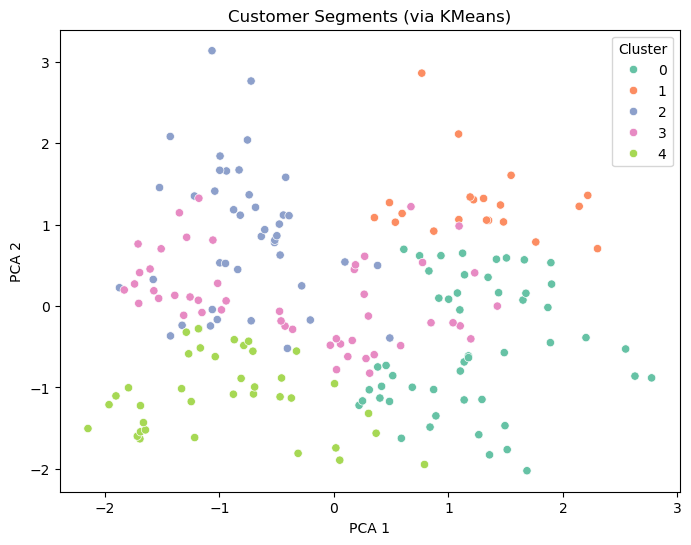

In [21]:
# Project to 2D again for cluster visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments (via KMeans)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


# 5.Evaluate clustering using Silhouette Score.


In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_df, df['Cluster'])
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.27
